# HA1, Polina Uvarova

# Задание

Допустим ты хочешь зайти в позицию по активу в момент выхода новости.
Пользуясь данными по ссылке на диске (ticker_price_moment_exit.hd5 и intraday_data) рассмотреть сценарий, в котором ты заходишь в позицию с новостями для которых модель предсказала высокий скор (scores_retrotesting.hd5)

# Решение

0. Знакомство с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
scores_retrotesting = pd.read_hdf('scores_retrotesting.hd5', key='df')
#scores_retrotesting.head()

In [3]:
ticker_price_moment_exit = pd.read_hdf('ticker_price_moment_exit.hd5', key='df')
#ticker_price_moment_exit.head()

In [4]:
scores_retrotesting['final_score'].describe()

count    36398.000000
mean        -2.883906
std          1.977213
min        -14.254610
25%         -4.125994
50%         -2.923671
75%         -1.633194
max          5.159716
Name: final_score, dtype: float64

Мы видим, что значительная часть наблюдений имеет негативный скор. То есть область нашего интереса сосредоточена на узком участке данных. Кроме того, дано нам не говорит, как мы понимаем "высокий скор". Давайте проанализируем участок датасета с хотя бы положительным скором.

In [5]:
positive_final_score = scores_retrotesting[scores_retrotesting['final_score'] >= 0]
positive_final_score['final_score'].describe()

count    2658.000000
mean        0.962754
std         0.840633
min         0.000150
25%         0.317807
50%         0.709202
75%         1.377775
max         5.159716
Name: final_score, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


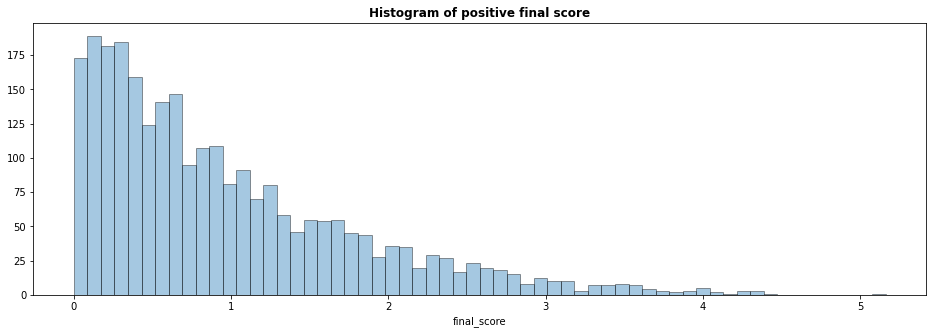

In [6]:
fig = plt.figure(figsize=(16, 5))

sns.distplot(positive_final_score['final_score'], hist=True, kde=False, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title("Histogram of positive final score", weight="bold")

plt.show()

похоже на гамма распределение

In [7]:
import scipy.stats as stats

In [8]:
stat,p = stats.kstest(positive_final_score['final_score'],'gamma', args=(1.99,))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('H0 is not rejected')
else:
    print('H0 is not accepted')

stat=0.361, p=0.000
H0 is not accepted


ладно, не гамма

In [9]:
positive_final_score_target1 = positive_final_score[positive_final_score['10_True_0.05'] == 1]
positive_final_score_target1['final_score'].describe()

count    180.000000
mean       1.294701
std        0.927683
min        0.007675
25%        0.553362
50%        1.172128
75%        1.904535
max        4.363404
Name: final_score, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


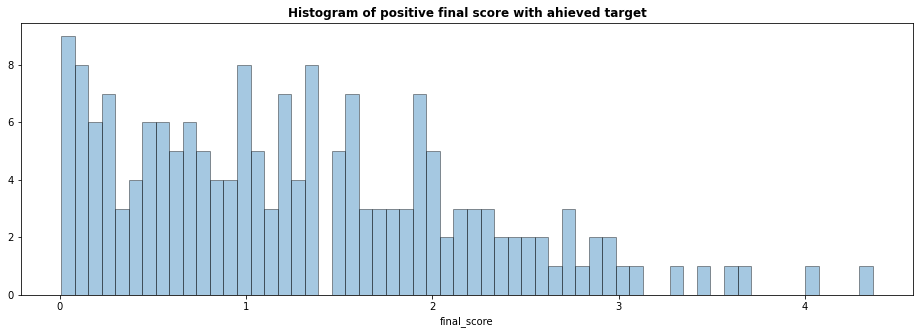

In [10]:
fig = plt.figure(figsize=(16, 5))

sns.distplot(positive_final_score_target1['final_score'], hist=True, kde=False, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title("Histogram of positive final score with ahieved target", weight="bold")

plt.show()

In [11]:
positive_final_score_1 = positive_final_score[positive_final_score['final_score'] >= 0.5]
positive_final_score_1['final_score'].describe()

count    1668.000000
mean        1.393246
std         0.785349
min         0.500126
25%         0.787382
50%         1.170210
75%         1.783352
max         5.159716
Name: final_score, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


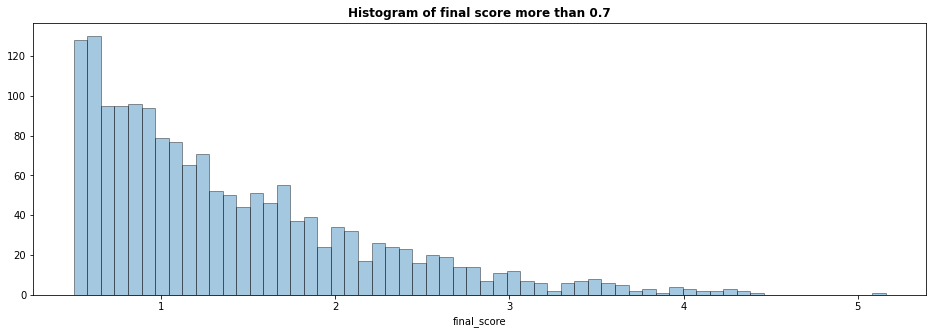

In [12]:
fig = plt.figure(figsize=(16, 5))

sns.distplot(positive_final_score_1['final_score'], hist=True, kde=False, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title("Histogram of final score more than 0.7", weight="bold")

plt.show()

In [13]:
print(positive_final_score['final_score'].count()/scores_retrotesting['final_score'].count())

0.07302599043903511


Мы видим, что положительным скором обладают всего 7.3% новостей/наблюдений.

In [14]:
main_dev_sample = pd.read_hdf('main_dev_sample.hd5', key='df')
main_dev_sample.head()

,ticker,publishedAt,val_flag,observation_id,news_id
0,MSFT,2020-08-03 23:45:58+00:00,0,213171,b65b908409773fd7a7fb489aafb8c547
1,MSFT,2020-08-03 23:45:58+00:00,0,54015,2e058d35d8f8df3b21564d08c06bf98c
2,ATVI,2020-08-03 23:42:26.655000+00:00,0,193143,a52bd4c43676e10cb41472f788306734
3,IDEX,2020-08-03 23:41:31+00:00,0,9674,082315fb122f8a86bca0e7db1a39df32
4,MSFT,2020-08-03 23:31:24.452000+00:00,0,256732,dba0f2f6caad1720801d0e2d35d6c16f


In [15]:
main_dev_sample.tail()

,ticker,publishedAt,val_flag,observation_id,news_id
298853,EPZM,2021-08-09 08:30:00+00:00,1,263116,e1338333198d85acc30d50bc5d500bc1
298854,AMZN,2021-08-09 08:11:28.638000+00:00,1,18954,100dfe030d4d628459afa319362c1034
298855,PDD,2021-08-09 08:09:18+00:00,1,42702,2463ba9896b55cd863e148448dc293eb
298856,BABA,2021-08-09 08:01:00+00:00,1,235642,c982ad693b8472843929304ecf234d56
298857,BNTX,2021-08-09 08:00:00+00:00,1,127246,6d1a9e2e56c13b3baec11130b585a7ed


In [16]:
main_dev_sample['publishedAt'].describe(datetime_is_numeric=True)

count                                 298858
mean     2021-02-12 12:51:39.711063808+00:00
min                2020-08-03 08:00:00+00:00
25%         2020-11-09 12:45:04.500000+00:00
50%                2021-02-22 12:00:13+00:00
75%      2021-05-13 14:06:26.249999872+00:00
max                2021-08-09 23:47:29+00:00
Name: publishedAt, dtype: object

In [17]:
data1 = pd.read_hdf('intraday_data/2021-08-12.hd5', key='df')
data1['formated time'].astype(str)
data1['ticker'].astype(str)
data1

,open,high,close,low,volume,time,formated time,ticker,autofilled
0,35.2400,35.2400,35.24,35.24,4578.0,1628775000,2021-08-12 13:30:00+00:00,WMG,False
1,35.2400,NaN,35.24,NaN,NaN,1628775060,2021-08-12 13:31:00+00:00,WMG,True
2,35.3200,35.3200,35.32,35.32,150.0,1628775120,2021-08-12 13:32:00+00:00,WMG,False
3,35.3200,NaN,35.32,NaN,NaN,1628775180,2021-08-12 13:33:00+00:00,WMG,True
4,35.2639,35.2639,35.21,35.18,3029.0,1628775240,2021-08-12 13:34:00+00:00,WMG,False
...,...,...,...,...,...,...,...,...,...
564,2.7500,NaN,2.75,NaN,NaN,1628802360,2021-08-12 21:06:00+00:00,STON,True
565,2.7500,NaN,2.75,NaN,NaN,1628802420,2021-08-12 21:07:00+00:00,STON,True
566,2.7500,NaN,2.75,NaN,NaN,1628802480,2021-08-12 21:08:00+00:00,STON,True
567,2.7500,NaN,2.75,NaN,NaN,1628802540,2021-08-12 21:09:00+00:00,STON,True


Вывод: положительных скоров - 7% или 2к наблюдений, из них только у 180 наблюдений цена выросла больше, чем на 5%, спустя 10 минут выхода новости. Сопоставив распределения положительных скоров и положительных скоров с удовлетворенным таргетом, я пришла к выводу, что буду брать целевое значение скора больше 0,5.

1. Стратегия

Бэкстори: Мой начальный бюджет 1 миллион долларов США. Я опытный инвестор, у меня хорошо распределено портфолио, и эти деньги, которые я включила в начальный бюджет, с полным понимаением отправляются под риск.

In [18]:
bud = 1000000

In [19]:
df= pd.merge(scores_retrotesting[['news_id','ticker', 'final_score','observation_id']],main_dev_sample[['news_id','publishedAt']],on='news_id', how='left')
df['price_data_file']=df['publishedAt'].astype(str).str[:10]
df['price_data_file_read']=df['price_data_file'].str.replace('-','_')
df['formated time']=df['publishedAt'].astype(str).str[:17]+'00+00:00'
df['formated time'].astype(str)
df.head()

,news_id,ticker,final_score,observation_id,publishedAt,price_data_file,price_data_file_read,formated time
0,000fb4a135119a9cf49fe51f91e37add,SALM,-1.322091,3,NaT,NaT,NaT,NaT00+00:00
1,000fda8be4442b6ffdcc247693075ffa,PCT,-1.206645,4,NaT,NaT,NaT,NaT00+00:00
2,00183e71753b66ed27eb5a59886eed7d,RXT,-4.440871,13,NaT,NaT,NaT,NaT00+00:00
3,008cc24b6c7b3411c1de52d6ab579c6c,ALYA,-1.930154,83,NaT,NaT,NaT,NaT00+00:00
4,01305f2972f162fa8e0a64d910b7a113,SELB,-1.934781,190,NaT,NaT,NaT,NaT00+00:00


In [20]:
df_best_score=df[df['final_score']>=0.5]
df_best_score['formated time'].astype(str)
df_best_score['ticker'].astype(str)
df_best_score['final_score'].describe()

count    1668.000000
mean        1.393246
std         0.785349
min         0.500126
25%         0.787382
50%         1.170210
75%         1.783352
max         5.159716
Name: final_score, dtype: float64

In [21]:
dates = df_best_score['price_data_file'].drop_duplicates()
dates.describe()

count       1
unique      1
top       NaT
freq        1
Name: price_data_file, dtype: object

То есть в среднем 1878/41 или 45 новостей в день. Получается, будем вносить пропорциональную сумму = 1 000 000/45 долларов США (для простоты)

In [22]:
#dates.tolist()

In [23]:
#for i in dates:
#    t=i.replace('_','-')
#    path='intraday_data/'+t+'.hd5'
#    name='data_'+i
#    name = pd.read_hdf(path, key='df')

def get_files(i):
    
    for item in i:
        t=item.replace('_','-')
        path='intraday_data/'+t+'.hd5'
        #name ='data_'+item
        for item in i:
            name = pd.read_hdf(path, key='df')
        return name

get_files(dates)

In [24]:
#data_2021_08_17.head()

In [25]:
df0 = pd.merge_asof(df_best_score,data1,on = 'formated time', by = 'ticker')
df0

MergeError: incompatible merge keys [1] dtype('O') and datetime64[ns, tzutc()], must be the same type

# Вывод

у меня ничего не получилось. но идея была в том, чтобы подтянуть к каждой новости ближайшую по времни цену закрытия. внутри дня совершать покупки в равных суммах и закрывать позиции на ночь. и каждый следующий день торговать на ту сумму, которую удалось извлечь в предыдущий вечер. чтобы как-то оценить свою стратегию, я бы сопоставила свой 1 млн долларов США на входе с суммой на выходе (последний день данных).
не знаю, к чему бы меня это привело, но мои навыки кодирования в питоне мне это уже не позволят сделать это, уложившись в дедлайн.

конечно, моя стратегия имеет белые пятна. например, я не корерктирую покупки на допустимый объем торгов бумаги, я не учитываю косяки, которые могут возникнуть в деятельности мосбиржи. так же сомнителен выбор равного инвестирования в разные бумаги с разным скором, можно было бы придумать что-то лучше, хотя бы с весами.

In [35]:
df_best_score

,news_id,ticker,final_score,observation_id,publishedAt,price_data_file,price_data_file_read,formated time
8,0216051d09514a4d1242a4397a3a8d1a,INM,0.720760,320,NaT,NaT,NaT,NaT00+00:00
25,06b4122c6019ebeace8e84d6ed88fb27,FBIO,1.073383,978,NaT,NaT,NaT,NaT00+00:00
26,06b4122c6019ebeace8e84d6ed88fb27,MBIO,1.073383,979,NaT,NaT,NaT,NaT00+00:00
34,085626c2474be2f6ade2d389f4d289b5,XNET,1.825751,1183,NaT,NaT,NaT,NaT00+00:00
45,0bbb3403279779b81fe6bc1fe556ff69,CTSO,0.676775,1692,NaT,NaT,NaT,NaT00+00:00
...,...,...,...,...,...,...,...,...
36287,9b48fdd41243a47e307cbac47564081e,BYRN,0.854469,22205,NaT,NaT,NaT,NaT00+00:00
36369,cde28178b31c5b19a833dd8b90b5a582,PBTS,1.769758,29174,NaT,NaT,NaT,NaT00+00:00
36381,d39b79e0a92a99bc15bbea7ecad9e03c,NEPH,0.930752,30024,NaT,NaT,NaT,NaT00+00:00
36411,dd495e51b0949e9e8047f1ccb881e536,BHAT,0.915918,31425,NaT,NaT,NaT,NaT00+00:00


In [27]:
data1

,open,high,close,low,volume,time,formated time,ticker,autofilled
0,35.2400,35.2400,35.24,35.24,4578.0,1628775000,2021-08-12 13:30:00+00:00,WMG,False
1,35.2400,NaN,35.24,NaN,NaN,1628775060,2021-08-12 13:31:00+00:00,WMG,True
2,35.3200,35.3200,35.32,35.32,150.0,1628775120,2021-08-12 13:32:00+00:00,WMG,False
3,35.3200,NaN,35.32,NaN,NaN,1628775180,2021-08-12 13:33:00+00:00,WMG,True
4,35.2639,35.2639,35.21,35.18,3029.0,1628775240,2021-08-12 13:34:00+00:00,WMG,False
...,...,...,...,...,...,...,...,...,...
564,2.7500,NaN,2.75,NaN,NaN,1628802360,2021-08-12 21:06:00+00:00,STON,True
565,2.7500,NaN,2.75,NaN,NaN,1628802420,2021-08-12 21:07:00+00:00,STON,True
566,2.7500,NaN,2.75,NaN,NaN,1628802480,2021-08-12 21:08:00+00:00,STON,True
567,2.7500,NaN,2.75,NaN,NaN,1628802540,2021-08-12 21:09:00+00:00,STON,True
